In [59]:
%load_ext autoreload
%autoreload 2
import tqix, qiskit, qsee.ansatz, qsee.utilities
import numpy as np
from sklearn.preprocessing import normalize

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


1. Generate a mixed state by Haar random $U$: $\rho = U|0..0\rangle\langle 0..0| U^{\dagger}$

In [60]:
num_qubits = 2
num_layers = 2
haar_mixed_state = tqix.qstate.random(num_qubits**2)
u_haar = tqix.utility.haar(2**num_qubits)
init_state = np.zeros((2**num_qubits, 1))
init_state[0] = 1
rho = (u_haar @ init_state) @ np.conjugate(np.transpose(u_haar @ init_state))
# normalized_rho = qsee.utilities.normalize_matrix(rho)
print(qsee.utilities.is_pos_def(rho))
print(qsee.utilities.is_normalized(rho))

True
(1.0000000000000004+0j)
True


2. Create a $V(\theta)$, such as from  all-to-all

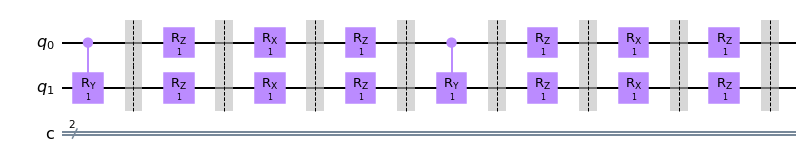

In [61]:
n_walltoall = qsee.ansatz.calculate_n_walltoall(num_qubits)
thetas = np.ones(num_layers* 3 * num_qubits + num_layers*n_walltoall)
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qsee.ansatz.create_Walltoall_layered_ansatz(qc, thetas, num_layers)
qc.draw('mpl')


3. Compute the evolved state $\rho_1 = V^{\dagger}\rho V$

In [62]:
V = qiskit.quantum_info.DensityMatrix.from_instruction(qc).data
rho_1 = np.conjugate(np.transpose(V)) @ rho @ V
print(qsee.utilities.is_pos_def(rho_1))
print(qsee.utilities.is_normalized(rho_1))

True
(0.07142449276512389-1.474514954580286e-17j)
False


4. Measure this final state by $|0..0\rangle$ and get probably

5. Get reconstructed state by $V |0..0\rangle\langle 0..0| V^{\dagger}$

In [48]:
psi = qiskit.quantum_info.Statevector.from_instruction(qc).data
psi = np.expand_dims(psi, 1)
reconstructed_state = psi @ np.conjugate(np.transpose(psi)) 
print(psi)

[[-0.20302105+0.75110445j]
 [-0.27504862+0.26524935j]
 [-0.42858429+0.23742088j]
 [-0.02431904-0.08928051j]]


In [49]:

print(qsee.utilities.is_pos_def(reconstructed_state))
print(qsee.utilities.is_normalized(reconstructed_state))

True
True


In [ ]:
state = qiskit.quantum_info.Statevector.from_instruction(qc).data


6. Calculate the fidelity and plot the result